# Parsing Journal of Cognitive Science article data Arthur already scraped (see GDrive)
Aim 1: Parse author & affiliation information for each article.

###### Tentative plans

LOOP THROUGH ALL ROWS: 
- Separate the author and affiliation data
- Create new row for each author in that paper, and denote whether that author was a corresponding author. 
- Also, keep the article name and index (row number) of the article in the original dataset.

In [1]:
import pandas as pd
import string as st

import matplotlib
import numpy as np
from datascience import *
import numpy as np

In [97]:
%matplotlib inline
import matplotlib.pyplot as plt

In [109]:
# Load data CSV -> datascience Table

data_file = '../data/171022_cogsci_journal_unprocessed.csv'
df_pd = pd.read_csv(data_file)

df = Table.read_table(data_file)
index_paperName = Table().with_columns(["Year",df.column(2),"Paper Index", df.column(0), "Article Name", df.column(1), "Old Type", df.column(9)])
index_paperName.show()

Year,Paper Index,Article Name,Old Type
nan,1,nan,nan
1977,2,Why Cognitive Science,Original Article
1977,3,"An Overview of KRL, a Knowledge Representation Language",Original Article
1977,4,Human and Computational Question Answering†,Original Article
1977,5,Definite Descriptions and Semantic Memory†,Original Article
1977,6,"Artificial Intelligence, Language, and the Study of Know ...",Original Article
1977,7,Induction of Augmented Transition Networks†,Original Article
1977,8,Decision Theory and Artificial Intelligence II: The Hung ...,Original Article
1977,9,Problem Solving in Semantically Rich Domains: An Example ...,Original Article
1977,10,"Verbs, Time, and Modality†",Original Article


In [63]:
#Checking article types
#pd.set_option('display.max_rows', 100)
#df_pd.groupby('article_type',sort=True).article_type.count().to_frame().sort_values('article_type',ascending=False)


The 'author_and_details' column in the dataframe contains author and affiliation data.

In [64]:
df_ad = df['authors_and_details'][0:]
df_ad = df_ad
#print(df_ad)

In [65]:
# Test cell
#df_ad[2].split('\n')#df['authors_and_details'][2]
#print(range(len(df_ad)))

In [66]:
# create list of lists where the number in each sublist is the article index and the length of the 
# sublist is the number of authors for that article
# - i+1 to counter-act data indexing
df_namesplit = []
df_numauth = []
for i in range(1, len(df_ad)):
        
    temp = df_ad[i].split('/n')
    df_namesplit.append(temp)
    df_numauth.append([i+1]*len(temp))

#print(df_numauth)

In [67]:
# Makes list of lists into single list
finList = []
for i in range(len(df_numauth)):
    for j in range(len(df_numauth[i])):
        finList.append(df_numauth[i][j])
        
#print(finList)

In [68]:
# This function takes a string (author of article ) and strips "Corresponding Author" -> returns stripped string
def clearCorresponding(author):
    result = []
    if ',Corresponding author' in author:

        endIndex = author.find(',')
        result.append(author[:endIndex])
        return result
    
    elif 'Corresponding author' in author:
        endIndex = author.find('Corresponding author')
        
        result.append(author[:endIndex])
        return result
   
    else:
        return author

In [69]:
# Main algorithm to construct table of Articles and Authors

results = Table(make_array("Article Id", "Author", "Department/University", "Corresponding Author"))
# For each sublist in the list of lists df_namesplit
articleCounter = 0 # Used to iterate through list of article id's
for i in range(len(df_namesplit)):
    
    articlesAuthors = df_namesplit[i]
    
    for j in range(len(articlesAuthors)):
        corr_auth = 0
        element = df_namesplit[i][j].split('             ')
        if len(element) > 1: # If the article has an author and the corresponding department/ university
    
            author = clearCorresponding(element[0])
            dept = element[1]
            
            if("Corresponding author" in df_namesplit[i][j]):
                corr_auth = 1
            results = results.with_row([finList[articleCounter],author, dept, corr_auth])
            articleCounter += 1
            
        else:            
            author = clearCorresponding(element[0])
            dept = "NaN"
            
            #newRow = make_array(corr_auth,author, dept)
            results = results.with_row([finList[articleCounter],author, dept, corr_auth])
            articleCounter += 1
            

In [100]:
# Join article name with article id number
results = results.join("Article Id", index_paperName, "Paper Index")
# not sure why we need to drop column 5 twice
#results.show()

In [71]:
Extended_Article = ["Extended Articles", "Extended Article", "Extended article", "Extended articles"]
Original_Article = ["Original Article", "Original Articles"]
Regular_Article = ["Regular Articles", "Regular articles", "Regular Article", "Regular article"]
Letter_to_Editor = ["Letters to the Editor","Letter to the Editor"]
Brief_Report = ["Brief Reports", "Brief Report", "Brief reports", "Brief report"]
Announcement = ["Announcement"]
Special = ["2011 Rumelhart Prize Special Issue Honoring Judea Pearl","SPECIAL ISSUE: 2009 Rumelhart Prize Special Issue Honoring Susan Carey","2010 Rumelhart Prize Special Issue Honoring James L. McClelland","SPECIAL ISSUE: 2007 Rumelhart Prize Special Issue Honoring Jeffrey L. Elman Language as a Dynamical System"]
Comment = ["Comment","Short Communication"]
Commentary = ["Commentary"]


In [72]:
def consolidate_Type (oldType):
    if oldType in Extended_Article:
        return "Extended Article"
    if oldType in Original_Article:
        return "Original Article"
    if oldType in Regular_Article:
        return "Regular Article"
    if oldType in Brief_Report:
        return "Brief Report"
    if oldType in Letter_to_Editor:
        return "Letter to Editor"
    if oldType in Announcement:
        return "Announcement"
    if oldType in Special:
        return "Special"
    if oldType in Comment:
        return "Comment"
    if oldType in Commentary:
        return "Commentary"
    return "null"

In [73]:
results = results.with_column("New Type", results.apply(consolidate_Type, "Old Type"))
results = results.drop("Old Type").drop("Year_2").drop("Article Name_2")


In [101]:
results.drop("Year_2").drop("Article Name_2")

Article Id,Author,Department/University,Corresponding Author,Year,Article Name,New Type,Old Type
2,Allan Collins,NaN,0,1977,Why Cognitive Science,Original Article,Original Article
3,Daniel G. Bobrow,Xerox Palo Alto Research Center,1,1977,"An Overview of KRL, a Knowledge Representation Language",Original Article,Original Article
3,Terry Winograd,Stanford University,0,1977,"An Overview of KRL, a Knowledge Representation Language",Original Article,Original Article
4,Wendy Lehnert,Yale University,1,1977,Human and Computational Question Answering†,Original Article,Original Article
5,Andrew Ortony,University of Illinois at Urbana-Champaign,1,1977,Definite Descriptions and Semantic Memory†,Original Article,Original Article
5,Richard C. Anderson,University of Illinois at Urbana-Champaign,0,1977,Definite Descriptions and Semantic Memory†,Original Article,Original Article
6,Professor Ira Goldstein,Massachusetts Institute of Technology,1,1977,"Artificial Intelligence, Language, and the Study of Know ...",Original Article,Original Article
6,Seymour Papert,Massachusetts Institute of Technology,0,1977,"Artificial Intelligence, Language, and the Study of Know ...",Original Article,Original Article
7,John R. Anderson,Yale University,1,1977,Induction of Augmented Transition Networks†,Original Article,Original Article
8,Jerome A. Feldman,University of Rochester,1,1977,Decision Theory and Artificial Intelligence II: The Hung ...,Original Article,Original Article


In [75]:
results2 = Table().with_columns(["Article Id",[], "Author", [], "Department/University", [], "Corresponding Author",[],"Year",[], "Article Name", [], "New Type", [],])
results2

Article Id,Author,Department/University,Corresponding Author,Year,Article Name,New Type


In [102]:

for i in range(results.num_rows):
    if results.column(5)[i] != "null":
        results2 = results2.with_row(results.row(i))  
#results2.show()

Exception: Row should have 8 columns

In [17]:
results2.to_csv("cleaned_data")

In [18]:
#Sorting by hexagonal terms code 

In [77]:
results2 = results2.with_column("Affiliation",[])

ValueError: Column length mismatch. New column does not have the same number of rows as table.

In [78]:
# issue Computational Neuroscience
compSci = ["artificial intelligence", "computer science", "informatics", "computer", "cybernetics", "computing", "eecs", "technology"]

In [79]:
def consolodateAffiliation(aff):
    temp = aff.lower()
    
    if "cognitive" in temp or "cognition" in temp:
        return "Cognitive Science"
    if "psychology" in temp or "psychological" in temp:
        return "Psychology"
    if "philosophy" in temp:
        return "Philosophy"
    if "linguistics" in temp:
        return "Linguistics"
    if "neuro" in temp or "brain" in temp:
        return "Neuroscience"
    for i in compSci:
        if i in temp:
            return "Artificial Intelligence"
    if "anthropology" in temp:
        return "Anthropology"
    if "social science" in temp:
        return "Social Science"
    return "Other"

In [80]:
results2 = results2.with_column("aff",results2.apply(consolodateAffiliation, 2))

In [104]:
# HOW TO COUNT AFFILIATIONS
print(results2.where("aff", are.equal_to("Cognitive Science")).num_rows)
print(results2.where("aff", are.equal_to("Psychology")).num_rows)
print(results2.where("aff", are.equal_to("Philosophy")).num_rows)
print(results2.where("aff", are.equal_to("Artificial Intelligence")).num_rows)
print(results2.where("aff", are.equal_to("Anthropology")).num_rows)
print(results2.where("aff", are.equal_to("Neuroscience")).num_rows)
print(results2.where("aff", are.equal_to("Linguistics")).num_rows)
print(results2.where("aff", are.equal_to("Social Science")).num_rows)
print(results2.where("aff", are.equal_to("Other")).num_rows)
#results2

166
406
18
137
14
8
41
4
2781


In [114]:
results2.where("Year", are.equal_to(1991)).sort("Article Name").show()

Article Id,Author,Department/University,Corresponding Author,Year,Article Name,New Type,aff
302,Michael Pazzani,"University of California, Irvine",1,1991,A Computational Theory of Learning Causal Relationships,Original Article,Other
304,Philippe G. Schyns,Brown University,1,1991,A Modular Neural Network Model of Concept Acquisition,Original Article,Other
290,Henk J. Haarmann,Max Planck Institute for Psycholinguistics and Nijmegen ...,1,1991,A computer model of the temporal course of agrammatic se ...,Original Article,Cognitive Science
290,Herman H.J. Kolk,Nijmegen Institute for Cognition Research and Informatio ...,0,1991,A computer model of the temporal course of agrammatic se ...,Original Article,Cognitive Science
309,nan,NaN,0,1991,Acknowledgement: Guest Reviewers,null,Other
307,nan,NaN,0,1991,Author Index to Volume 15,null,Other
292,"Afzal Ballim,","University of Geneva, Switzerland",0,1991,"Belief ascription, metaphor, and intensional identification",Original Article,Other
292,Yorick Wilks,New Mexico State University USA,1,1991,"Belief ascription, metaphor, and intensional identification",Original Article,Other
292,John Barnden,New Mexico State University USA,0,1991,"Belief ascription, metaphor, and intensional identification",Original Article,Other
293,nan,NaN,0,1991,Cognitive science news,null,Other


['Anthropology' 'Artificial Intelligence' 'Cognitive Science' 'Linguistics'
 'Neuroscience' 'Other' 'Philosophy' 'Psychology' 'Social Science']


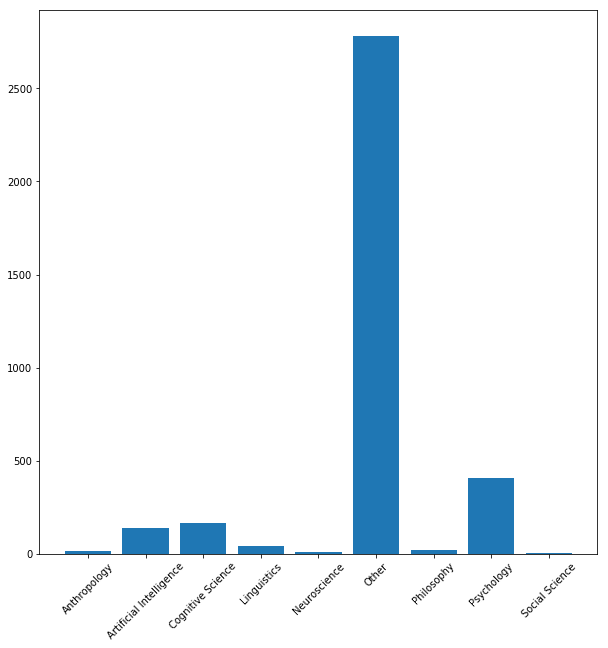

In [115]:
keys = np.unique(results2['aff'])
counts = np.zeros(len(keys))
print(keys)
for i,k in enumerate(keys):
    counts[i] = results2.where("aff", are.equal_to(k)).num_rows

plt.figure(figsize=(10,10))
plt.bar(range(len(counts)),counts)
plt.xticks(range(len(counts)), keys, rotation=45);
#plt.ylim([0,500])

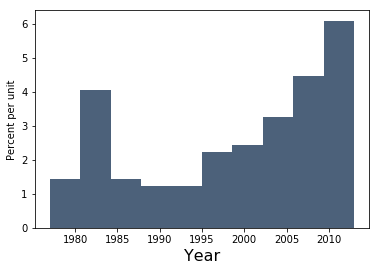

In [116]:
# Artificial Intelligence
results2.where("aff", are.equal_to("Artificial Intelligence")).hist("Year")

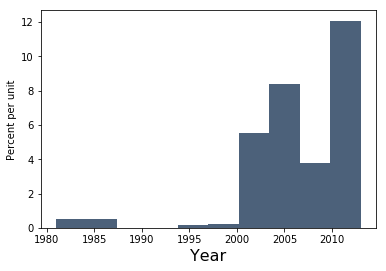

In [117]:
# Psychology
results2.where("aff", are.equal_to("Psychology")).hist("Year")

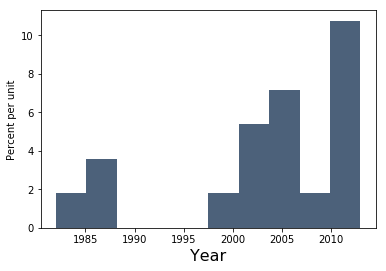

In [89]:
# Philosophy
results2.where("aff", are.equal_to("Philosophy")).hist("Year")

In [106]:
results2.where("aff", are.equal_to("Philosophy")).show()

Article Id,Author,Department/University,Corresponding Author,Year,Article Name,New Type,aff
96,Scott Weinstein,Department of Philosophy University of Pennsylvania,0,1982,Ideal Learning Machines†,Original Article,Philosophy
176,Paul A. Wagner,"Philosophy, University of Houston-Clear Lake, Houston, T ...",0,1986,Review of Steven Stich's “From Folk Psychology to Cognit ...,null,Philosophy
205,Jennifer Church,"Philosophy Dept., Vassar College",0,1987,"Aylwin, S. Structure in Thought and Feeling",null,Philosophy
497,Steve Giambrone,"Department of Philosophy, University of Louisiana at Laf ...",0,2000,Toward a Science of Other Minds: Escaping the Argument b ...,Original Article,Philosophy
511,Paul Thagard,"Department of Philosophy, University of Waterloo, Waterl ...",1,2001,Integrating structure and meaning: a distributed model o ...,Original Article,Philosophy
528,Cameron Shelley,"Department of Philosophy, University of Michigan, Ann Ar ...",1,2001,The bicoherence theory of situational irony,Original Article,Philosophy
581,Jonathan A. Waskan,"Department of Philosophy, Beckman Institute for Advanced ...",1,2003,Intrinsic cognitive models,Original Article,Philosophy
625,David Over,"Department of Philosophy, University of Sunderland, Sund ...",0,2004,Feature centrality and property induction,Original Article,Philosophy
713,Michiel van Lambalgen,"Department of Philosophy, University of Amsterdam",1,2005,Semantic Interpretation as Computation in Nonmonotonic L ...,Original Article,Philosophy
743,"Chris Eliasmith,","Department of Philosophy, University of Waterloo",0,2006,Is the Brain a Quantum Computer?,Original Article,Philosophy


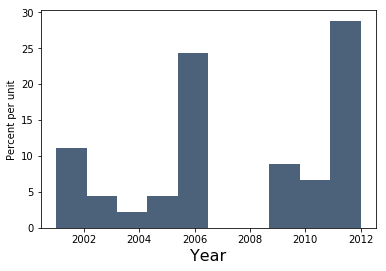

In [90]:
# Linguistics
results2.where("aff", are.equal_to("Linguistics")).hist("Year")

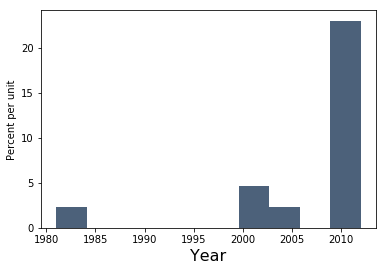

In [91]:
# Anthropology
results2.where("aff", are.equal_to("Anthropology")).hist("Year")

In [111]:
results2.where("aff", are.equal_to("Anthropology")).show()

Article Id,Author,Department/University,Corresponding Author,Year,Article Name,New Type,aff


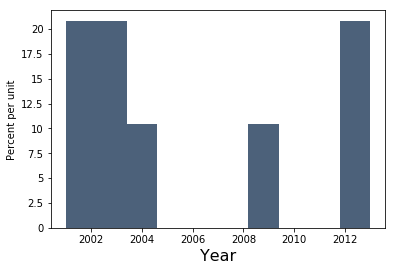

In [92]:
# Neuroscience
results2.where("aff", are.equal_to("Neuroscience")).hist("Year")

In [119]:
# Logic, Language and Computation,
# Physics
# Decision technologies
# Neural computation
# Psycholinguistics Psycholinguistique
# Kinesiology
# department of speech pathology
# US ARMY Aeromedical Research
# Asian Studies
# Behaviorial Science
# Communication
# biophysics
# CECS
# Engineering
# Language Sciences
# Neural Science
# Scienza Cognitiva
# Department of Accounting and MIS
# Biological Sciences \n biology
# Electrical and Electronic Engineering
# Department of English Philology
# Department of Environmental Information
# Department of Hospital Medicine
# Department of Human Development
# Department of Humanities
# Department of Management Science and Information Systems
# Department of Management and Economics
# Department of Management and Organization
# Department of Mathematics
# Department of Organismic and Evolutionary Biology
# Department of Physical Medicine and Rehabilitation
# Department of Physical Therapy, University of Connecticut
# Department of Physiology, Feinberg School of Medicine
# Department of Psychiatry and the Behavioral Sciences
# Department of Radiology
# Department of Teaching, Learning, & Culture
# Discipline of Pharmacology
# Asian and African Area Studies

#classify departments into multiple bins
others = results2.where("aff", are.equal_to("Other"))
others.select(2).sort(0,distinct=True).show()

Department/University
""
Amanda Kelley is now at the US Army Aeromedical Resear ...
Dr. Nicola Knight died in June 2009 as this paper was ...
These authors contributed equally to this work.
"Laboratoire Parole et Langage, CNRS & Aix-Marseille Uni ..."
"Laboratoire URECA, Lille 3 University"
"Laboratoire de Psycholinguistique Expérimentale, Geneva ..."
van GelderCorresponding author
"von Koten,"
AT&T Bell Laboratories


In [ ]:
# All below cells are tests to see what the data is doing

In [ ]:
df_dept = pd.read_csv("cleaned_data")
colnames= ["Article Id","Author","Department_University","Corresponding Author","Article Name","Type"]
df_dept_new=pd.read_csv("cleaned_data", names=colnames)

In [ ]:
bad_inds = np.where(df_dept_new['Department_University'].isnull())[0]
len(bad_inds)
#len(df_dept_new)

In [ ]:
df_pd.iloc[368]['authors_and_details']

In [ ]:
df_dept_new.iloc[bad_inds]

In [ ]:
pd.set_option('display.max_rows', 100)
df_dept_new.groupby('Department_University',sort=True).Department_University.count().to_frame().sort_values('Department_University',ascending=False)

In [ ]:
# index the row (e.g. 2nd) and split by /n character
df['authors_and_details'][2].split('/n')

In [ ]:
# the 0th element contains the information of the first author
df['authors_and_details'][2].split('/n')[0]

In [ ]:
# further split author info to separate name and affiliation
au1 = df['authors_and_details'][2].split('/n')[0].split('             ')

In [ ]:
au1

In [ ]:
# find the corresponding author and delete that part of the string ',Corresponding author'
if 'Corresponding author' in au1[0]:
    endind = au1[0].find(',Corresponding author')
    print(endind)
    print(au1[0][:endind], '- ', au1[1])

In [ ]:
# make a new dataset


### The latter ones have a little more information
Let's go to index 1500

In [ ]:
df['authors_and_details'][1501].split('/n')

In [ ]:
df['article_name'][1501]